In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Para obtener los datos
from sklearn.model_selection import RepeatedKFold
import requests
import zipfile
import io

# Para las manipulaciones y análisis de datos
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Para los charts
import seaborn as sns
from matplotlib import pyplot as plt

# Para particiones, validaciones y scores
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.inspection import permutation_importance

# Para transformaciones
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer

# Para pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


**DICCIONARIO DE VARIABLES**


X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 


X2: Gender (1 = male; 2 = female). 


X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 


X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 


X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 


X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 


X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 



#### Carga de Informacion

In [5]:
#Importar Datos
url = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
df = pd.read_csv(url)
df.head(5)


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


#### Analisis Exploratorio

Clasificacion de Variables

In [6]:
Categoricas = ['X2','X3','X4']
Continuas = ['X1','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']


In [7]:
df.shape
# 3,000 observaciones 
# 25 variables

(30000, 25)

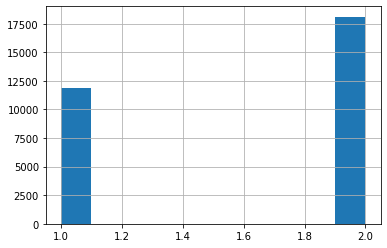

In [19]:
df['X2'].hist()


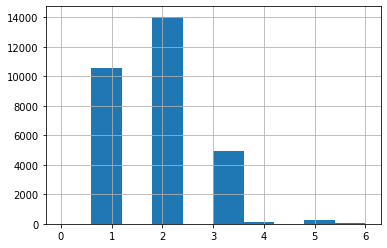

In [20]:
df['X3'].hist()

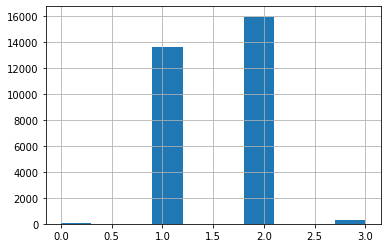

In [21]:
df['X4'].hist()

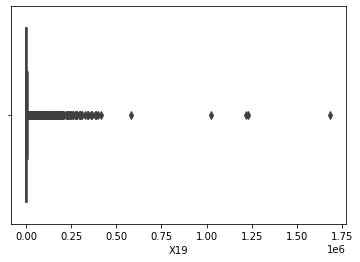

In [57]:
sns.boxplot(x=df.X19)


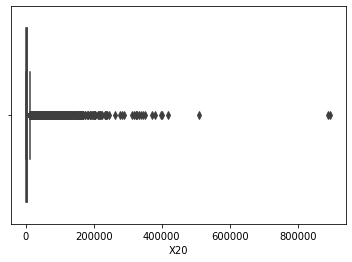

In [58]:
sns.boxplot(x=df.X20)


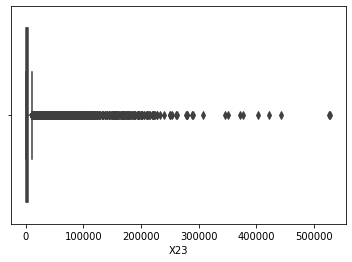

In [61]:
sns.boxplot(x=df.X23)

In [63]:
var=['Y','X1','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']

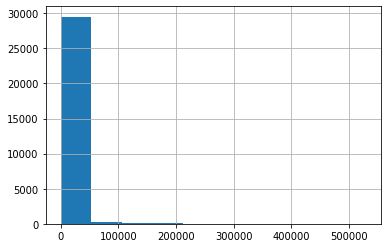

In [41]:
df.X23.hist()

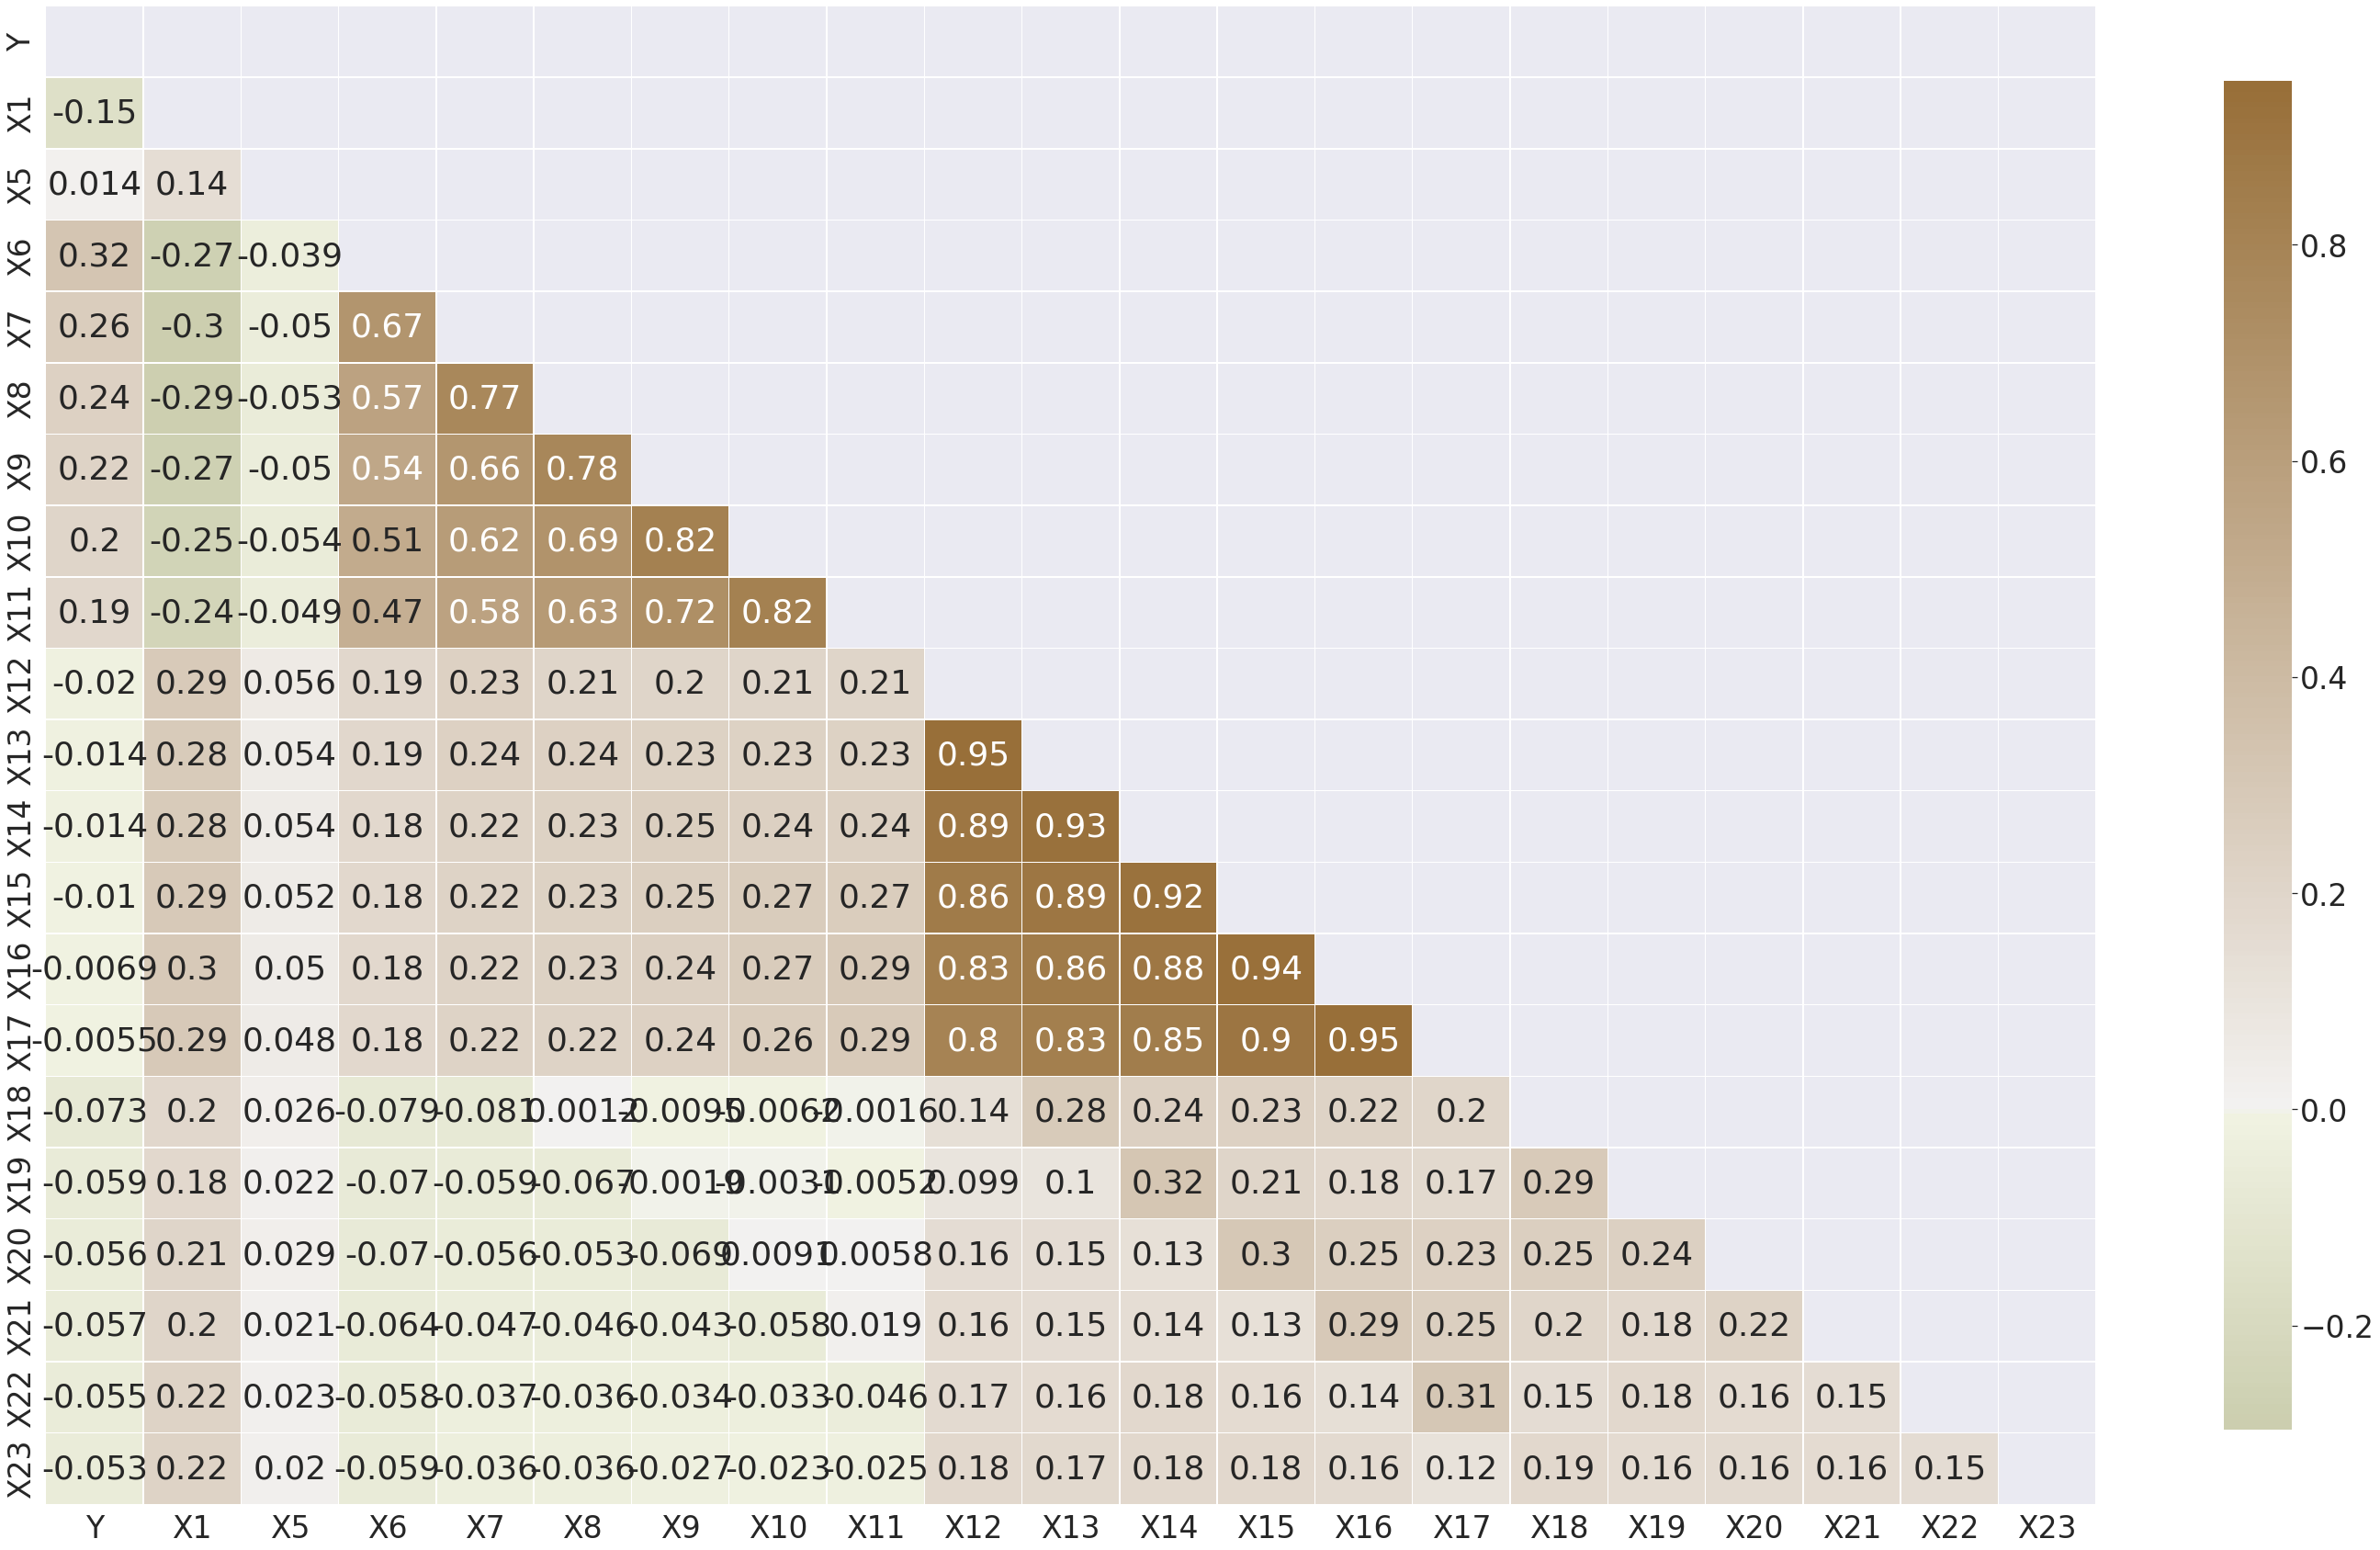

In [86]:
#Matriz de correlacion

sns.set_theme(style='darkgrid')
sns.set(font_scale=3)
corr= ndf[var].corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax =plt.subplots(figsize=(50,30))
cmap = sns.diverging_palette(90,50,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,center=0,square=False,linewidths=.5,annot=True,cbar_kws={'shrink':.9})

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

Hay valores ausentes

In [65]:
df[Continuas].describe()
#analisis descripvitvo de variables continuas

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,30000.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,29984.000000,29986.000000,29989.000000,29989.000000,2.998700e+04,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000
mean,167484.322667,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,-0.291136,51236.862750,49190.734669,4.702535e+04,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977
std,129747.661567,9.218024,1.123829,1.197254,1.196048,1.169153,1.133296,1.150134,73645.219278,71183.385123,6.936086e+04,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3565.000000,2986.000000,2.667500e+03,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22387.000000,21207.000000,2.008900e+04,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67139.000000,64027.000000,6.018200e+04,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [66]:
#Eliminamos datos faltantes del datframe

ndf = df.copy()
ndf.dropna(axis = 0, inplace = True)

In [67]:
#Buscamos Datos atipicos
desc = ndf.describe([.99])
desc

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
99%,29693.430000,500000.000000,2.000000,5.000000,3.000000,60.000000,3.000000,3.000000,3.000000,3.000000,...,305008.610000,285882.190000,279591.580000,66488.490000,7.665186e+04,70000.000000,67156.920000,65631.080000,82789.150000,1.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [68]:
desc['ID'][6]

30000.0

In [69]:
#Que tan grande son los outlier respecto a al retso de valores
result = []
for element in Continuas:
  result.append((element,desc[element][6]/desc[element][5]))
result

# X18, X19 y X20 tiene valores atipicos

[('X1', 2.0),
 ('X5', 1.3166666666666667),
 ('X6', 2.6666666666666665),
 ('X7', 2.6666666666666665),
 ('X8', 2.6666666666666665),
 ('X9', 2.6666666666666665),
 ('X10', 2.6666666666666665),
 ('X11', 2.6666666666666665),
 ('X12', 2.7546498358767217),
 ('X13', 2.9152903003149206),
 ('X14', 5.115571140954511),
 ('X15', 2.9231502677908012),
 ('X16', 3.2431925892270517),
 ('X17', 3.4395313335258515),
 ('X18', 13.138394329605015),
 ('X19', 21.972839276176728),
 ('X20', 12.800571428571429),
 ('X21', 9.24699941569684),
 ('X22', 6.498887417363845),
 ('X23', 6.3856918448854625)]

In [70]:
#Quitamos datos atipicos
ndf2 = ndf[(ndf['X18']<66488.490000)& (ndf['X19']<7.665186e+04	)& (ndf['X20']<70000.000000)]
ndf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29140 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      29140 non-null  int64  
 1   X1      29140 non-null  int64  
 2   X2      29140 non-null  float64
 3   X3      29140 non-null  float64
 4   X4      29140 non-null  float64
 5   X5      29140 non-null  float64
 6   X6      29140 non-null  float64
 7   X7      29140 non-null  float64
 8   X8      29140 non-null  float64
 9   X9      29140 non-null  float64
 10  X10     29140 non-null  float64
 11  X11     29140 non-null  float64
 12  X12     29140 non-null  float64
 13  X13     29140 non-null  float64
 14  X14     29140 non-null  float64
 15  X15     29140 non-null  float64
 16  X16     29140 non-null  float64
 17  X17     29140 non-null  float64
 18  X18     29140 non-null  float64
 19  X19     29140 non-null  float64
 20  X20     29140 non-null  float64
 21  X21     29140 non-null  float64
 22

In [71]:
#Normalizacion de Variables 
def normalize (x):
  min = np.min(x)
  max = np.max(x)
  range = max - min
  return [(a - min)/range for a in x]

In [72]:
for element in Continuas:
  ndf2[element] = normalize(ndf2[element])

ndf2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,0.012658,2.0,2.0,1.0,0.051724,0.4,0.4,0.1,0.1,...,0.193873,0.089884,0.326684,0.000000,0.008989,0.000000,0.000000,0.000000,0.000000,1.0
1,2,0.139241,2.0,2.0,2.0,0.086207,0.1,0.4,0.2,0.2,...,0.197604,0.093703,0.329821,0.000000,0.013046,0.014381,0.001891,0.000000,0.004515,1.0
2,3,0.101266,2.0,2.0,2.0,0.224138,0.2,0.2,0.2,0.2,...,0.210216,0.106404,0.341641,0.022837,0.019569,0.014381,0.001891,0.002345,0.011287,0.0
3,4,0.050633,2.0,2.0,1.0,0.275862,0.2,0.2,0.2,0.2,...,0.226163,0.121888,0.355107,0.030089,0.026340,0.017257,0.002080,0.002506,0.002257,0.0
4,5,0.050633,1.0,2.0,1.0,0.620690,0.1,0.2,0.1,0.2,...,0.217753,0.111043,0.345087,0.030089,0.478546,0.143810,0.017017,0.001615,0.001533,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,29995,0.088608,1.0,2.0,2.0,0.224138,0.4,0.4,0.4,0.4,...,0.282278,0.181176,0.404754,0.105311,0.045662,0.000000,0.013235,0.000000,0.009029,1.0
29995,29996,0.265823,1.0,3.0,1.0,0.310345,0.2,0.2,0.2,0.2,...,0.294235,0.124405,0.342056,0.127877,0.260923,0.071948,0.005761,0.011723,0.002257,0.0
29996,29997,0.177215,1.0,3.0,2.0,0.379310,0.1,0.1,0.1,0.1,...,0.204113,0.095620,0.326684,0.027637,0.046001,0.129401,0.000244,0.000000,0.000000,0.0
29997,29998,0.025316,1.0,2.0,2.0,0.275862,0.6,0.5,0.4,0.1,...,0.217683,0.112630,0.345304,0.000000,0.000000,0.316383,0.007941,0.004689,0.006998,1.0


In [73]:
#eliminamos variables que no nos aportan informacion
ndf3 = ndf2.copy()
ndf3.drop(['ID','Y'],axis=1,inplace =True)

In [74]:
for element in Categoricas:
  ndf3[element] = ndf3[element].astype(int)

In [75]:
ndf3[element]

0        1
1        2
2        2
3        1
4        1
        ..
29994    2
29995    1
29996    2
29997    2
29999    1
Name: X4, Length: 29140, dtype: int64

In [76]:
 ndf4 = pd.get_dummies(data=ndf3, columns=Categoricas)
 ndf4

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,...,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_0,X4_1,X4_2,X4_3
0,0.012658,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.024040,0.089560,...,0,1,0,0,0,0,0,1,0,0
1,0.139241,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.022422,0.087868,...,0,1,0,0,0,0,0,0,1,0
2,0.101266,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.057311,0.102985,...,0,1,0,0,0,0,0,0,1,0
3,0.050633,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.080631,0.145021,...,0,1,0,0,0,0,0,1,0,0
4,0.050633,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.030219,0.092716,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,0.088608,0.224138,0.4,0.4,0.4,0.4,0.4,0.4,0.114218,0.181242,...,0,1,0,0,0,0,0,0,1,0
29995,0.265823,0.310345,0.2,0.2,0.2,0.2,0.2,0.2,0.267123,0.322695,...,0,0,1,0,0,0,0,1,0,0
29996,0.177215,0.379310,0.1,0.1,0.1,0.1,0.2,0.2,0.021110,0.087994,...,0,0,1,0,0,0,0,0,1,0
29997,0.025316,0.275862,0.6,0.5,0.4,0.1,0.2,0.2,0.023583,0.089872,...,0,1,0,0,0,0,0,0,1,0


In [77]:
#PCA
Numero_Columnas = ndf4.shape[1]
pcs = PCA(n_components = Numero_Columnas)
Nuevos_Nombres = ndf4.columns.to_list()
pcs.fit(ndf4[Nuevos_Nombres])
pcsSummary_df =pd.DataFrame({'Standard Deviation': np.sqrt(pcs.explained_variance_),
                             'Poportion of variance': pcs.explained_variance_ratio_,
                             'Culmulative Proportion': np.cumsum(pcs.explained_variance_ratio_)}
    
)

pcsSummary_df

,Standard Deviation,Poportion of variance,Culmulative Proportion
0,7.277832e-01,2.911934e-01,0.291193
1,6.878666e-01,2.601274e-01,0.551321
2,6.225427e-01,2.130668e-01,0.764388
3,4.480046e-01,1.103424e-01,0.874730
4,2.507594e-01,3.456940e-02,0.909299
5,2.071458e-01,2.359011e-02,0.932890
6,1.378726e-01,1.045042e-02,0.943340
7,1.254468e-01,8.651612e-03,0.951992
8,1.161719e-01,7.419590e-03,0.959411
9,1.116967e-01,6.858964e-03,0.966270


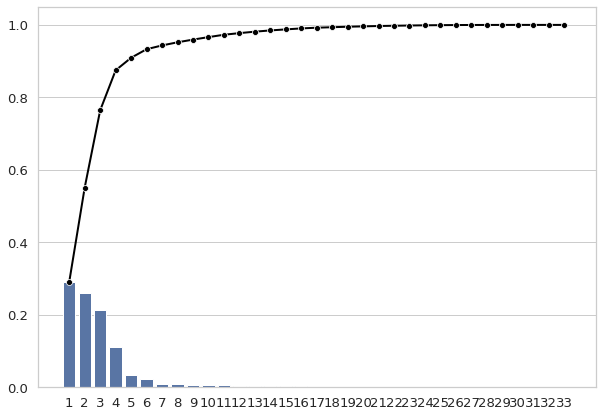

In [78]:
PC_components = np.arange(pcs.n_components_)+1
_ = sns.set(style='whitegrid',font_scale =1.2)

fig,ax = plt.subplots(figsize=(10,7))

_ = sns.barplot(x=PC_components,
                y=pcs.explained_variance_ratio_,
                color = 'b')

_ = sns.lineplot(x=PC_components-1,
                 y= np.cumsum(pcs.explained_variance_ratio_),
                 color ='black',
                 linestyle='-',
                 linewidth=2,
                 marker='o',
                 )